# INM427 Neural Computing Final Coursework
## By Ho Yin Tam

Import the library.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
from skorch import NeuralNetClassifier 
from joblib import dump, load
import time

Import the test dataset and convert it into tensor datatype.

In [2]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

X_test_tensor = torch.tensor(X_test.to_numpy()).float()
# Convert the data frame to series
y_test = y_test.squeeze()
y_test_tensor = torch.tensor(y_test.to_numpy()).long()

# Display the shape and data type of the feature and target label
print('Shape of test data (features):', X_test_tensor.shape)
print('Shape of test data (target label):', y_test_tensor.shape)
print('Data type:', X_test_tensor.dtype)
print('Data type:', y_test_tensor.dtype)

Shape of test data (features): torch.Size([150, 11])
Shape of test data (target label): torch.Size([150])
Data type: torch.float32
Data type: torch.int64


Import the best-trained multilayer perceptron model and use the test dataset to test it.

In [3]:
class MLP_onehiddenlayer(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(MLP_onehiddenlayer, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim = 1)
     
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [4]:
best_mlp_model = load('best_mlp_model.joblib')
start_time = time.time()
mlp_y_pred = best_mlp_model.predict(X_test_tensor)
end_time = time.time()
mlp_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

Compute the confusion matrix and visualize it.

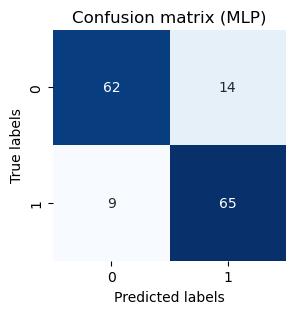

In [5]:
mlp_conf_m = confusion_matrix(mlp_y_pred, y_test_tensor)
mlp_conf_m
plt.figure(figsize = (3,3))
sns.heatmap(mlp_conf_m, annot = True, cmap = 'Blues', cbar = False)
plt.title('Confusion matrix (MLP)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Calculate the accuracy, precision, recall, specificity and f1 score and display them.

In [6]:
# Test time (seconds)
test_time =  end_time - start_time

# Accuracy
mlp_accuracy = accuracy_score(mlp_y_pred, y_test_tensor)

# Precision
mlp_precision = precision_score(mlp_y_pred, y_test_tensor)

# Recall
mlp_recall = recall_score(mlp_y_pred, y_test_tensor)

# Specificity
mlp_specificity = mlp_conf_m[0, 0] / (mlp_conf_m[0,0] + mlp_conf_m[0,1])

# F1score
mlp_f1_score = f1_score(mlp_y_pred, y_test_tensor)

# Display the results
print('Test time (seconds):', test_time)
print('Accuracy:', mlp_accuracy)
print('Precision:', mlp_precision)
print('Recall:', mlp_recall)
print('Specificity:', mlp_specificity)
print('F1 score:', mlp_f1_score)

Test time (seconds): 0.04589033126831055
Accuracy: 0.8466666666666667
Precision: 0.8227848101265823
Recall: 0.8783783783783784
Specificity: 0.8157894736842105
F1 score: 0.8496732026143792


Visualize the receiver operating characteristic (ROC) curve and compute the area under the curve (AUC).

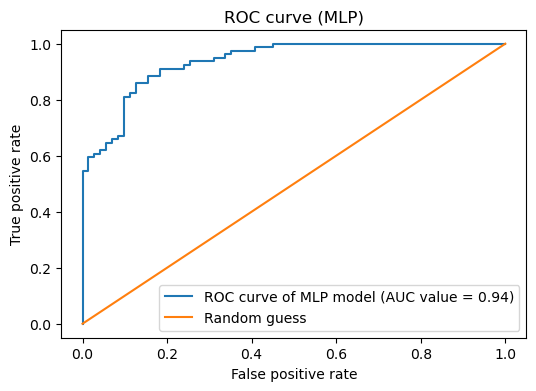

In [7]:
y_prob = best_mlp_model.predict_proba(X_test_tensor)[:, 1]
mlp_false_pr, mlp_true_pr, thresholds = roc_curve(y_test_tensor, y_prob)
mlp_auc_value = auc(mlp_false_pr, mlp_true_pr)

plt.figure(figsize = (6, 4))

plt.plot(mlp_false_pr, mlp_true_pr, label = 'ROC curve of MLP model (AUC value = %0.2f)' %mlp_auc_value)
plt.plot([0, 1], [0, 1], label = 'Random guess')

plt.title('ROC curve (MLP)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()